# 6.3 Geographic Visualization

### This script contains the following:

#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 01. Importing

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# Importing data
path = r'/Users/ngawangdhundup/Documents/Career Foundry Bootcamp/DM 6'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_clean.csv'), index_col = 0)

##### JSON

In [3]:
# Allows matplotlib visuals to appear in notebook

%matplotlib inline

In [4]:
# import json

country_geo = r'/Users/ngawangdhundup/Documents/Career Foundry Bootcamp/DM 6/02 Data/Original Data/us-regions.json'

In [5]:
# check json

f = open(r'/Users/ngawangdhundup/Documents/Career Foundry Bootcamp/DM 6/02 Data/Original Data/us-regions.json',)

data = json.load(f)

for i in data['features']:
        print(i)

{'type': 'Feature', 'properties': {'name': 'Midwest'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-104.32617187499999, 49.03786794532644], [-103.974609375, 41.04621681452063], [-101.6015625, 41.04621681452063], [-102.48046875, 37.020098201368114], [-94.5703125, 37.09023980307208], [-93.603515625, 36.4566360115962], [-89.296875, 37.23032838760387], [-87.71484375, 38.272688535980976], [-85.4296875, 38.54816542304656], [-84.638671875, 39.16414104768742], [-83.232421875, 38.75408327579141], [-82.177734375, 38.685509760012], [-80.85937499999999, 39.842286020743394], [-80.595703125, 41.57436130598913], [-83.583984375, 41.96765920367816], [-82.79296874999999, 42.4234565179383], [-82.705078125, 43.389081939117496], [-83.232421875, 43.70759350405294], [-84.111328125, 43.96119063892024], [-83.49609375, 44.653024159812], [-84.55078125, 45.460130637921004], [-85.4296875, 45.1510532655634], [-86.396484375, 44.213709909702054], [-86.220703125, 43.389081939117496], [-86.220703125, 42.163403424

In [6]:
df.head(5)

age     sex     bmi  children smoker     region      charges  sex_binary  \
0   19  female  27.900         0    yes  southwest  16884.92400           0   
1   18    male  33.770         1     no  southeast   1725.55230           1   
2   28    male  33.000         3     no  southeast   4449.46200           1   
3   33    male  22.705         0     no  northwest  21984.47061           1   
4   32    male  28.880         0     no  northwest   3866.85520           1   

   smoker_binary Cost category  
0              1   Middle Cost  
1              0      Low Cost  
2              0      Low Cost  
3              0   Middle Cost  
4              0      Low Cost

In [9]:
unique_region = df['region'].value_counts()
print(unique_region)

South        364
West         325
Midwest      324
Northeast    324
Name: region, dtype: int64


In [8]:
# define a function to rename regions

def rename_region(region):
    if region.lower() == 'northwest':
        return 'Midwest'
    elif region.lower() == 'southwest':
        return 'West'
    elif region.lower() == 'southeast':
        return 'South'
    else:
        return 'Northeast'
    
# Apply the function to the region column
df['region'] = df['region'].apply(rename_region)

### 2. Data Wrangling

##### Fix dummy columns

In [102]:
# Select only the necessary columns and put them in a list called columns

columns = [
"age",
"sex_binary", 
"bmi",
"children",
"smoker_binary",
"region",
"charges"
]

In [103]:
# Create a subset
region_rec = df[columns]

In [104]:
region_rec.head(1)

age  sex_binary   bmi  children  smoker_binary region    charges
0   19           0  27.9         0              1   West  16884.924

In [105]:
# Select only the states from state_rec in a new subset

region_num = region_rec[["region"
]]

In [106]:
# Create new column 'state' in the state_rec dataframe

region_rec['REGION_NAME'] = region_num

/var/folders/f1/9l5c1gh11fg31qkvvqmyx9mc0000gn/T/ipykernel_22639/2050199381.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region_rec['REGION_NAME'] = region_num


In [107]:
region_rec.columns

Index(['age', 'sex_binary', 'bmi', 'children', 'smoker_binary', 'region',
       'charges', 'REGION_NAME'],
      dtype='object')

### 3. Consistency checks

In [92]:
# Check for missing values

region_rec.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
REGION_NAME    0
dtype: int64

In [93]:
dups = region_rec.duplicated()

In [95]:
dups.shape

False    1337
dtype: int64

<Axes: xlabel='charges', ylabel='Count'>

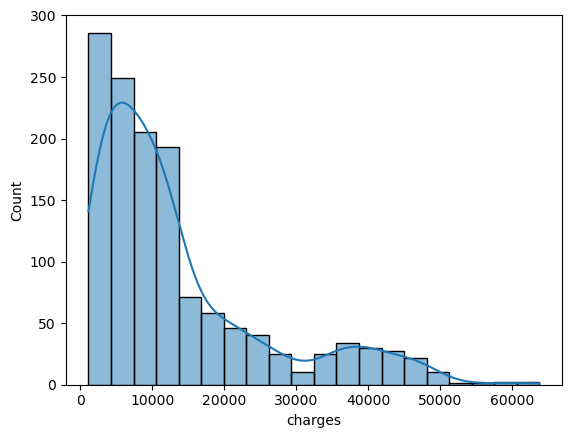

In [91]:
sns.histplot(region_rec['charges'], bins=20, kde = True) # shows extreme values for 'charges'

<Axes: xlabel='age', ylabel='Count'>

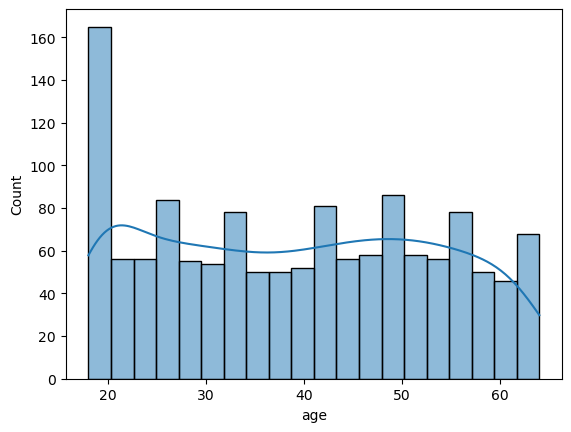

In [96]:
sns.histplot(region_rec['age'], bins=20, kde = True) # shows extreme values for 'age'

### 4. Plotting choropleth

In [114]:
# Create a data frame with just the states and values we want plotted

data_to_plot = region_rec[['region', 'charges']]
data_to_plot.head()

region      charges
0     West  16884.92400
1    South   1725.55230
2    South   4449.46200
3  Midwest  21984.47061
4  Midwest   3866.85520

In [74]:
data_to_plot.value_counts()

region     sex   
South      male      189
           female    175
Midwest    female    164
Northeast  male      163
West       male      163
           female    162
Northeast  female    161
Midwest    male      160
dtype: int64

In [59]:
region_num.value_counts()

region   
South        364
West         325
Midwest      324
Northeast    324
dtype: int64

In [115]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['region', 'charges'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "charges").add_to(map)
folium.LayerControl().add_to(map)

map

In [116]:
map.save('plot_data.html')

In [124]:
# Create a data frame with just the states and values we want plotted

data_to_plot = region_rec[['region', 'sex_binary']]
data_to_plot.head()

region  sex_binary
0     West           0
1    South           1
2    South           1
3  Midwest           1
4  Midwest           1

In [126]:
# Setup a folium map at a high-level zoom
map_sex = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['region', 'sex_binary'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "sex").add_to(map_sex)
folium.LayerControl().add_to(map_sex)

map_sex

In [127]:
map_sex.save('sexchlorpeth.html')

In [120]:
# Create a data frame with just the states and values we want plotted

data_to_plot = region_rec[['region', 'smoker_binary']]
data_to_plot.head()

region  smoker_binary
0     West              1
1    South              0
2    South              0
3  Midwest              0
4  Midwest              0

In [122]:
# Setup a folium map at a high-level zoom
map_smoker = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['region', 'smoker_binary'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "smoker").add_to(map_smoker)
folium.LayerControl().add_to(map_smoker)

map_smoker

In [123]:
map_smoker.save('smokechlorpeth.html')

##### Analysis

The charges map shows there is a significant portion of people with high medical charges in the northeast. 

the sex map shows there is no sig portion of of one gender in one region of america

The smoker map shows a color scheme very similar to the charges map from before, so this leads me to think smokers tend to live in the northeast region of america and have high medical costs.

In [88]:
df.head()

age     sex     bmi  children smoker   region      charges  sex_binary  \
0   19  female  27.900         0    yes     West  16884.92400           0   
1   18    male  33.770         1     no    South   1725.55230           1   
2   28    male  33.000         3     no    South   4449.46200           1   
3   33    male  22.705         0     no  Midwest  21984.47061           1   
4   32    male  28.880         0     no  Midwest   3866.85520           1   

   smoker_binary Cost category  
0              1   Middle Cost  
1              0      Low Cost  
2              0      Low Cost  
3              0   Middle Cost  
4              0      Low Cost

## 04. Exporting

In [89]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'insurance_clean.csv'))